<a href="https://colab.research.google.com/github/imrib/ImriBregman-HW/blob/main/HW3_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Act like Python programming in the Google Colab environment. Use keras.
Don't write right now, is that understood?


Use the fashion MNIST dataset.
Create a neural network that receives an image.
And the output is 10 outputs that represent a vector of probabilities. Use softmax.
Show the result including its labels.
Finally randomly display 25 images from the dataset.

In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Build the neural network
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 7s 6ms/step - loss: 0.5408 - accuracy: 0.8119 - val_loss: 0.4425 - val_accuracy: 0.8428
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4027 - accuracy: 0.8567 - val_loss: 0.4447 - val_accuracy: 0.8430
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3627 - accuracy: 0.8680 - val_loss: 0.3571 - val_accuracy: 0.8730
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3323 - accuracy: 0.8799 - val_loss: 0.3561 - val_accuracy: 0.8725
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3136 - accuracy: 0.8856 - val_loss: 0.3377 - val_accuracy: 0.8796
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2973 - accuracy: 0.8896 - val_loss: 0.3410 - val_accuracy: 0.8767
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2831 - accuracy: 0.8950 - val_loss: 0.3285 - val_accuracy: 0.8845
Epoch 

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8793
Test accuracy: 87.93%


1/1 [==============================] - 0s 178ms/step


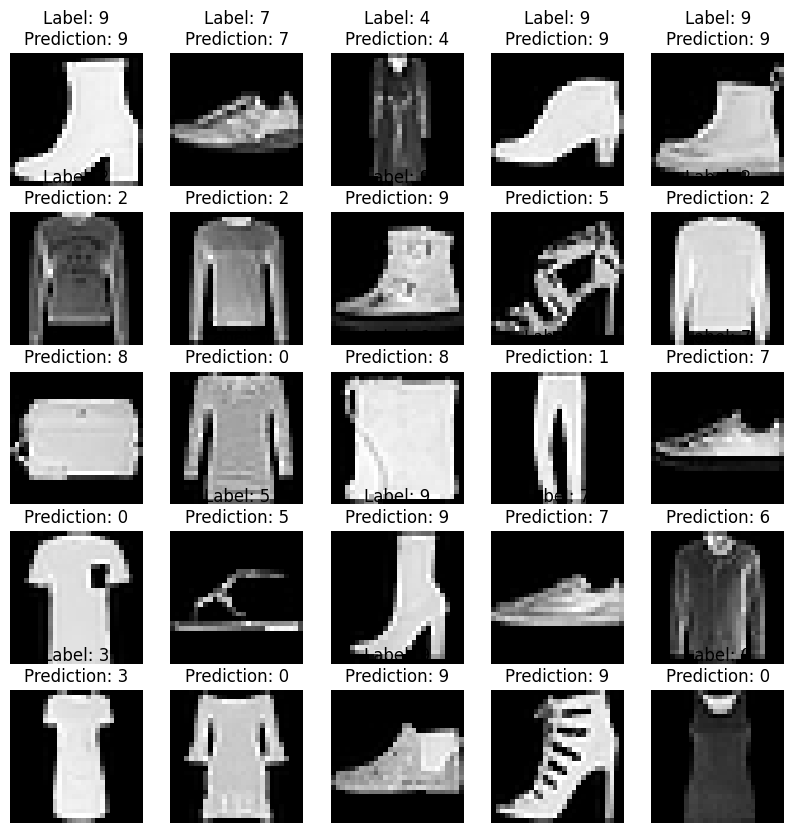

In [7]:
# Randomly display 25 images
random_indices = np.random.choice(test_images.shape[0], size=25, replace=False)

# Make predictions
predictions = model.predict(test_images[random_indices])

# Display the images and their predicted labels
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    plt.subplot(5, 5, i)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {np.argmax(test_labels[index])}\nPrediction: {np.argmax(predictions[i-1])}')
    plt.axis('off')

plt.show()


In [8]:
# Build the neural network with 10 output units
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


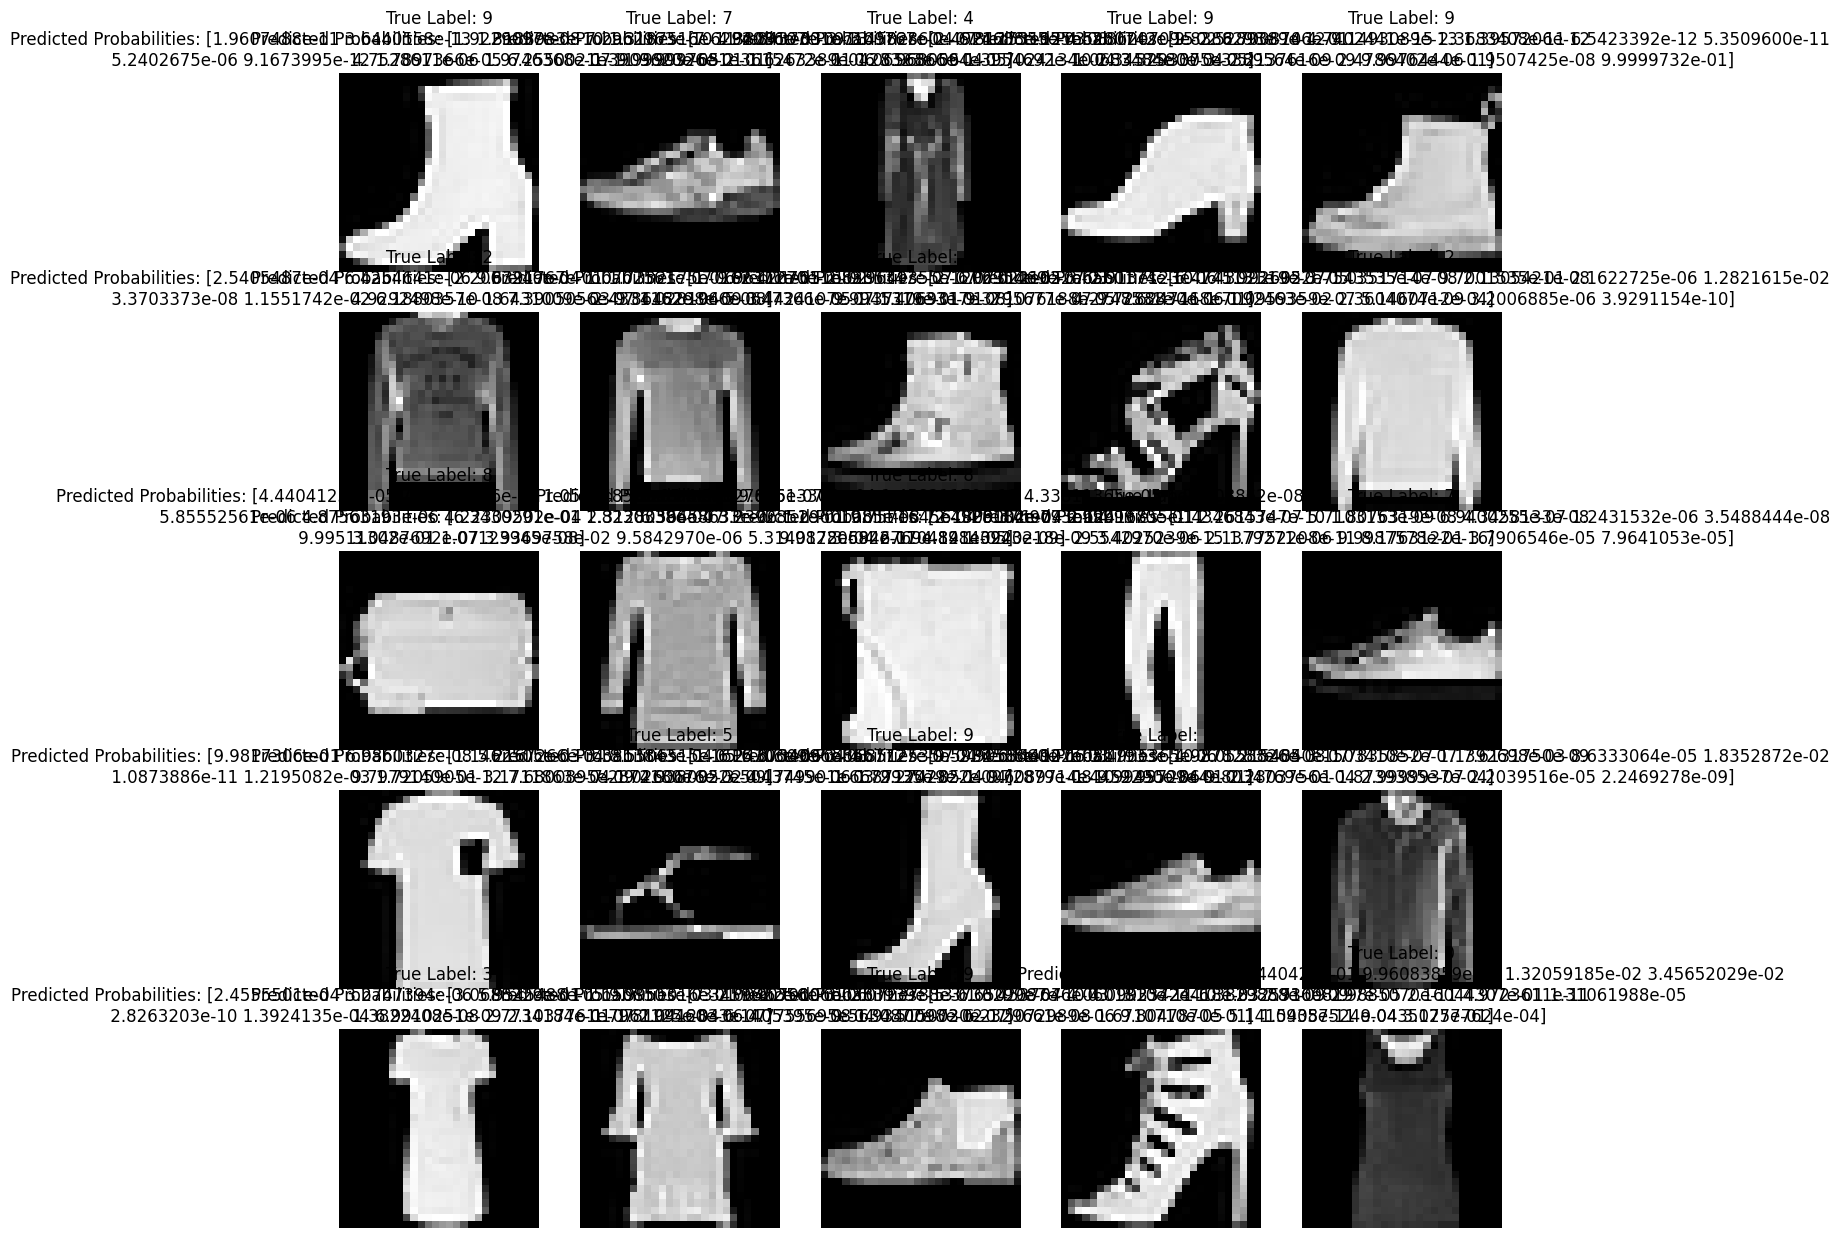

In [11]:
# Randomly display 25 images with their probability vectors
plt.figure(figsize=(15, 15))
for i, index in enumerate(random_indices, 1):
    plt.subplot(5, 5, i)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f'True Label: {np.argmax(test_labels[index])}\nPredicted Probabilities: {predictions[i-1]}')
    plt.axis('off')

plt.show()


In [12]:
import pandas as pd

# Randomly display 25 images with their probability vectors in a table
data = {'True Label': [], 'Predicted Label': [], 'Probabilities': []}

for i, index in enumerate(random_indices, 1):
    true_label = np.argmax(test_labels[index])
    predicted_label = np.argmax(predictions[i-1])
    probabilities = predictions[i-1]

    data['True Label'].append(true_label)
    data['Predicted Label'].append(predicted_label)
    data['Probabilities'].append(probabilities)

table_df = pd.DataFrame(data)

# Display the table
print(table_df)


    True Label  Predicted Label  \
0            9                9   
1            7                7   
2            4                4   
3            9                9   
4            9                9   
5            2                2   
6            2                2   
7            9                9   
8            5                5   
9            2                2   
10           8                8   
11           0                0   
12           8                8   
13           1                1   
14           7                7   
15           0                0   
16           5                5   
17           9                9   
18           7                7   
19           6                6   
20           3                3   
21           3                0   
22           9                9   
23           5                9   
24           0                0   

                                        Probabilities  
0   [1.9607488e-11, 3.6440558e-13

Prepare a vector of labels corresponding to the index

In [13]:
import pandas as pd

# Prepare a vector of labels corresponding to the index
image_labels = [np.argmax(test_labels[index]) for index in random_indices]

# Randomly display 25 images with their labels, true label, predicted label, and probabilities in a table
data = {'Index': random_indices, 'Image Label': image_labels, 'True Label': [], 'Predicted Label': [], 'Probabilities': []}

for i, index in enumerate(random_indices, 1):
    true_label = np.argmax(test_labels[index])
    predicted_label = np.argmax(predictions[i-1])
    probabilities = predictions[i-1]

    data['True Label'].append(true_label)
    data['Predicted Label'].append(predicted_label)
    data['Probabilities'].append(probabilities)

table_df = pd.DataFrame(data)

# Display the table
print(table_df)


    Index  Image Label  True Label  Predicted Label  \
0    5116            9           9                9   
1     746            7           7                7   
2    1334            4           4                4   
3    2523            9           9                9   
4    8581            9           9                9   
5    8681            2           2                2   
6    7650            2           2                2   
7    6629            9           9                9   
8    7685            5           5                5   
9    2295            2           2                2   
10   8577            8           8                8   
11    764            0           0                0   
12     53            8           8                8   
13      2            1           1                1   
14   7893            7           7                7   
15   8044            0           0                0   
16   8729            5           5                5   
17   8342 

convert Image Label to text. show only one image

   Index Image Label  True Label Predicted Label  Probabilities
0   5116  Ankle boot  Ankle boot      Ankle boot   1.960749e-11
1   5116  Ankle boot  Ankle boot      Ankle boot   3.644056e-13
2   5116  Ankle boot  Ankle boot      Ankle boot   1.318898e-10
3   5116  Ankle boot  Ankle boot      Ankle boot   1.318752e-11
4   5116  Ankle boot  Ankle boot      Ankle boot   4.843730e-13
5   5116  Ankle boot  Ankle boot      Ankle boot   5.240267e-06
6   5116  Ankle boot  Ankle boot      Ankle boot   9.167399e-12
7   5116  Ankle boot  Ankle boot      Ankle boot   1.789737e-05
8   5116  Ankle boot  Ankle boot      Ankle boot   6.255002e-11
9   5116  Ankle boot  Ankle boot      Ankle boot   9.999768e-01


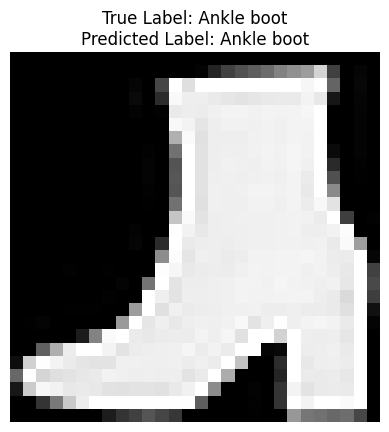

In [14]:
# Choose a single image for display
single_index = random_indices[0]

# Convert label to text
label_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Prepare a vector of labels corresponding to the index
image_labels = [label_mapping[np.argmax(test_labels[index])] for index in random_indices]

# Display information for a single image
single_true_label = label_mapping[np.argmax(test_labels[single_index])]
single_predicted_label = label_mapping[np.argmax(predictions[0])]

# Create a DataFrame for the single image
single_data = {'Index': single_index, 'Image Label': image_labels[0], 'True Label': single_true_label,
               'Predicted Label': single_predicted_label, 'Probabilities': predictions[0]}
single_table_df = pd.DataFrame(single_data)

# Display the table for the single image
print(single_table_df)

# Display the image
plt.imshow(test_images[single_index].reshape(28, 28), cmap='gray')
plt.title(f'True Label: {single_true_label}\nPredicted Label: {single_predicted_label}')
plt.axis('off')
plt.show()


   Index Image Label  True Label Predicted Label  Probabilities
0   5116  Ankle boot  Ankle boot      Ankle boot   1.960749e-11
1   5116  Ankle boot  Ankle boot      Ankle boot   3.644056e-13
2   5116  Ankle boot  Ankle boot      Ankle boot   1.318898e-10
3   5116  Ankle boot  Ankle boot      Ankle boot   1.318752e-11
4   5116  Ankle boot  Ankle boot      Ankle boot   4.843730e-13
5   5116  Ankle boot  Ankle boot      Ankle boot   5.240267e-06
6   5116  Ankle boot  Ankle boot      Ankle boot   9.167399e-12
7   5116  Ankle boot  Ankle boot      Ankle boot   1.789737e-05
8   5116  Ankle boot  Ankle boot      Ankle boot   6.255002e-11
9   5116  Ankle boot  Ankle boot      Ankle boot   9.999768e-01


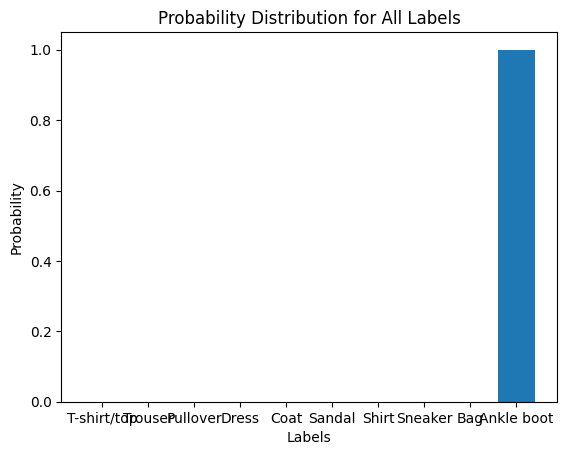

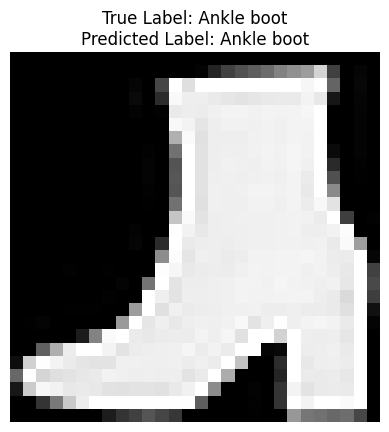

In [17]:
# Choose a single image for display
single_index = random_indices[0]

# Convert label to text
label_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Prepare a vector of labels corresponding to the index
image_labels = [label_mapping[np.argmax(test_labels[index])] for index in random_indices]

# Display information for a single image
single_true_label = label_mapping[np.argmax(test_labels[single_index])]
single_predicted_label = label_mapping[np.argmax(predictions[0])]

# Create a DataFrame for the single image
single_data = {'Index': single_index, 'Image Label': image_labels[0], 'True Label': single_true_label,
               'Predicted Label': single_predicted_label, 'Probabilities': predictions[0]}
single_table_df = pd.DataFrame(single_data)

# Display the table for the single image
print(single_table_df)

# Display the probability distribution for all labels
labels = [label_mapping[i] for i in range(10)]
plt.bar(labels, predictions[0])
plt.title('Probability Distribution for All Labels')
plt.xlabel('Labels')
plt.ylabel('Probability')
plt.show()

# Display the image
plt.imshow(test_images[single_index].reshape(28, 28), cmap='gray')
plt.title(f'True Label: {single_true_label}\nPredicted Label: {single_predicted_label}')
plt.axis('off')
plt.show()



Probability Distribution for All Labels:
              Probability
T-shirt/top  1.960749e-11
Trouser      3.644056e-13
Pullover     1.318898e-10
Dress        1.318752e-11
Coat         4.843730e-13
Sandal       5.240267e-06
Shirt        9.167399e-12
Sneaker      1.789737e-05
Bag          6.255002e-11
Ankle boot   9.999768e-01


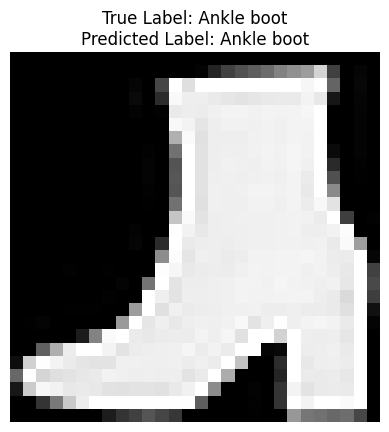

In [19]:
# Choose a single image for display
single_index = random_indices[0]

# Convert label to text
label_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Prepare a vector of labels corresponding to the index
image_labels = [label_mapping[np.argmax(test_labels[index])] for index in random_indices]

# Display information for a single image
single_true_label = label_mapping[np.argmax(test_labels[single_index])]
single_predicted_label = label_mapping[np.argmax(predictions[0])]

# Create a DataFrame for the single image with the probability distribution
single_data = {'Index': single_index, 'Image Label': image_labels[0], 'True Label': single_true_label,
               'Predicted Label': single_predicted_label, 'Probabilities': predictions[0]}
single_table_df = pd.DataFrame(single_data)


# Display the probability distribution for all labels
labels = [label_mapping[i] for i in range(10)]
probability_df = pd.DataFrame(predictions[0], index=labels, columns=['Probability'])
print('\nProbability Distribution for All Labels:')
print(probability_df)

# Display the image
plt.imshow(test_images[single_index].reshape(28, 28), cmap='gray')
plt.title(f'True Label: {single_true_label}\nPredicted Label: {single_predicted_label}')
plt.axis('off')
plt.show()


    Index  Image Label   True Label Predicted Label  \
0    5116   Ankle boot   Ankle boot      Ankle boot   
1     746      Sneaker      Sneaker         Sneaker   
2    1334         Coat         Coat            Coat   
3    2523   Ankle boot   Ankle boot      Ankle boot   
4    8581   Ankle boot   Ankle boot      Ankle boot   
5    8681     Pullover     Pullover        Pullover   
6    7650     Pullover     Pullover        Pullover   
7    6629   Ankle boot   Ankle boot      Ankle boot   
8    7685       Sandal       Sandal          Sandal   
9    2295     Pullover     Pullover        Pullover   
10   8577          Bag          Bag             Bag   
11    764  T-shirt/top  T-shirt/top     T-shirt/top   
12     53          Bag          Bag             Bag   
13      2      Trouser      Trouser         Trouser   
14   7893      Sneaker      Sneaker         Sneaker   
15   8044  T-shirt/top  T-shirt/top     T-shirt/top   
16   8729       Sandal       Sandal          Sandal   
17   8342 

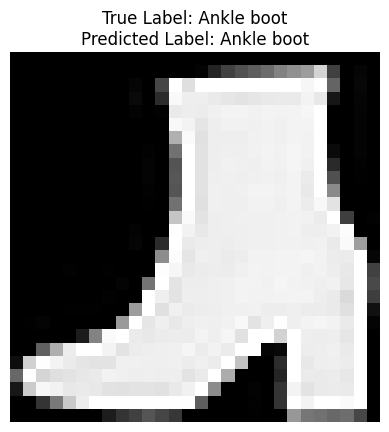


Probability Distribution for All Labels - Image 2:
              Probability
T-shirt/top  1.922910e-08
Trouser      7.296296e-10
Pullover     4.380911e-09
Dress        3.458286e-07
Coat         4.153195e-08
Sandal       4.752861e-06
Shirt        1.974637e-07
Sneaker      9.999033e-01
Bag          1.626339e-06
Ankle boot   8.968059e-05


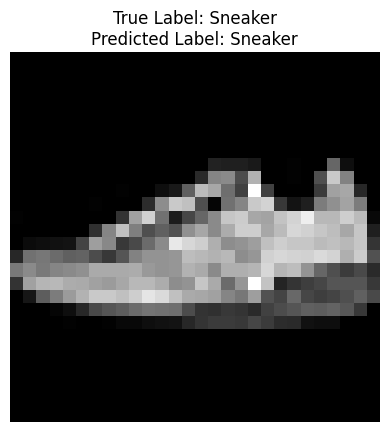


Probability Distribution for All Labels - Image 3:
             Probability
T-shirt/top     0.007629
Trouser         0.000371
Pullover        0.006813
Dress           0.078621
Coat            0.670087
Sandal          0.000014
Shirt           0.236155
Sneaker         0.000107
Bag             0.000170
Ankle boot      0.000033


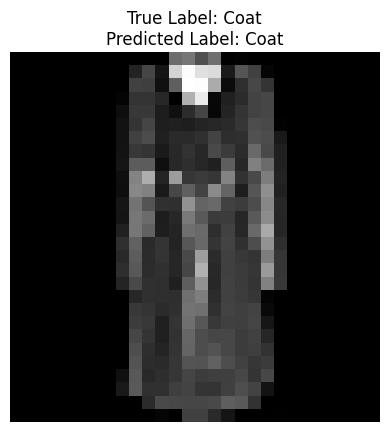


Probability Distribution for All Labels - Image 4:
              Probability
T-shirt/top  2.492169e-12
Trouser      4.528074e-15
Pullover     2.528939e-12
Dress        9.149309e-13
Coat         1.395721e-12
Sandal       1.042332e-06
Shirt        1.395469e-10
Sneaker      2.345758e-04
Bag          2.213762e-09
Ankle boot   9.997644e-01


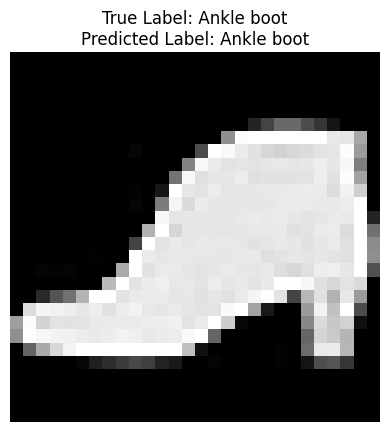


Probability Distribution for All Labels - Image 5:
              Probability
T-shirt/top  9.838830e-10
Trouser      4.740244e-15
Pullover     2.368341e-11
Dress        6.542339e-12
Coat         5.350960e-11
Sandal       1.068348e-07
Shirt        3.338956e-09
Sneaker      2.478640e-06
Bag          1.950743e-08
Ankle boot   9.999973e-01


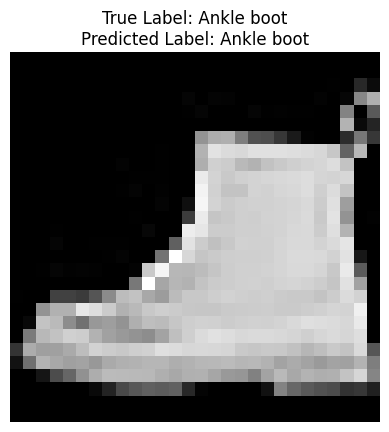


Probability Distribution for All Labels - Image 6:
              Probability
T-shirt/top  2.540549e-04
Trouser      6.425464e-06
Pullover     9.639177e-01
Dress        1.733217e-06
Coat         2.426751e-02
Sandal       3.370337e-08
Shirt        1.155174e-02
Sneaker      6.188036e-08
Bag          7.390506e-07
Ankle boot   1.028197e-08


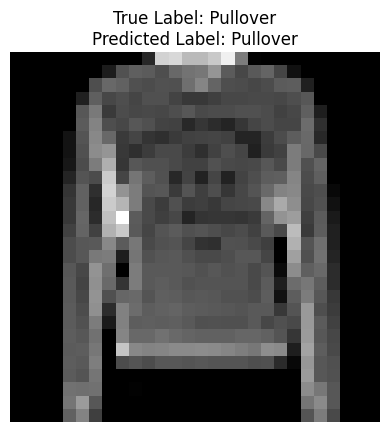


Probability Distribution for All Labels - Image 7:
              Probability
T-shirt/top  2.206725e-04
Trouser      1.070256e-07
Pullover     9.961127e-01
Dress        9.964936e-07
Coat         2.022102e-03
Sandal       4.929250e-10
Shirt        1.643101e-03
Sneaker      9.864830e-09
Bag          3.442411e-07
Ankle boot   1.406932e-08


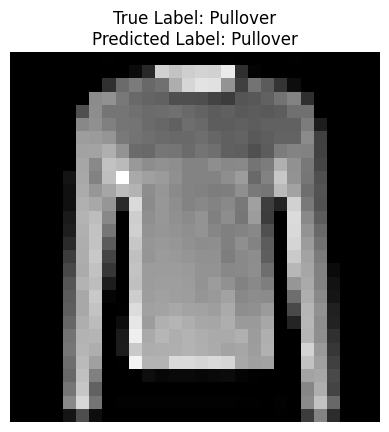


Probability Distribution for All Labels - Image 8:
              Probability
T-shirt/top  1.016237e-05
Trouser      2.833535e-07
Pullover     6.073147e-07
Dress        2.913712e-06
Coat         1.992692e-05
Sandal       2.433416e-04
Shirt        5.064737e-05
Sneaker      1.371763e-01
Bag          2.107619e-05
Ankle boot   8.624747e-01


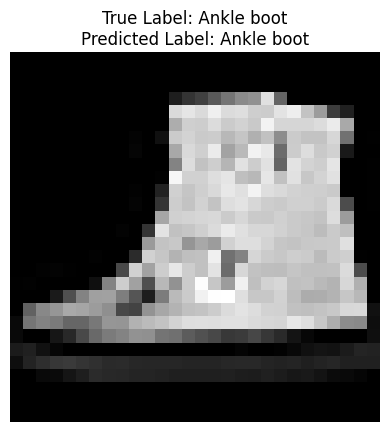


Probability Distribution for All Labels - Image 9:
              Probability
T-shirt/top  2.120695e-05
Trouser      3.656017e-10
Pullover     1.430232e-07
Dress        1.035171e-08
Coat         2.130542e-08
Sandal       9.994532e-01
Shirt        9.379568e-07
Sneaker      9.728883e-06
Bag          1.095936e-07
Ankle boot   5.146071e-04


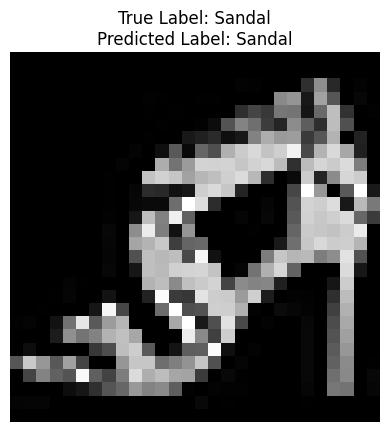


Probability Distribution for All Labels - Image 10:
              Probability
T-shirt/top  6.474513e-05
Trouser      3.754353e-07
Pullover     9.700153e-01
Dress        2.162272e-06
Coat         1.282161e-02
Sandal       4.274753e-11
Shirt        1.709246e-02
Sneaker      2.360407e-09
Bag          3.200689e-06
Ankle boot   3.929115e-10


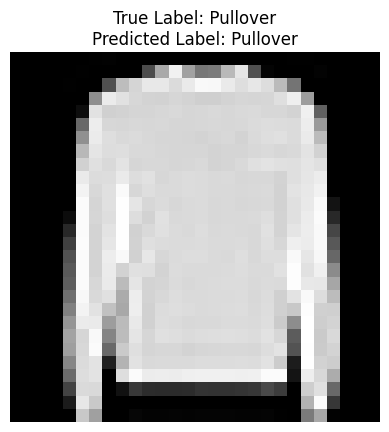


Probability Distribution for All Labels - Image 11:
              Probability
T-shirt/top  4.440413e-05
Trouser      7.335391e-09
Pullover     1.054549e-05
Dress        4.341279e-07
Coat         5.855526e-06
Sandal       4.875632e-06
Shirt        4.223095e-04
Sneaker      2.312804e-07
Bag          9.995113e-01
Ankle boot   1.071239e-08


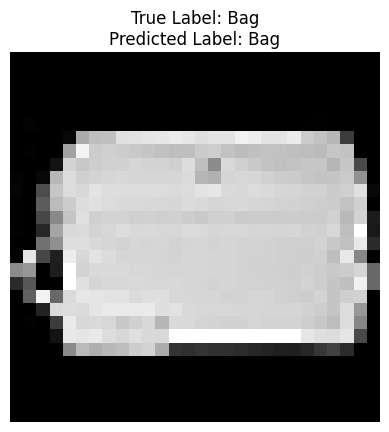


Probability Distribution for All Labels - Image 12:
              Probability
T-shirt/top  6.343029e-01
Trouser      1.823034e-04
Pullover     3.239285e-01
Dress        9.757165e-04
Coat         6.376979e-04
Sandal       3.048769e-07
Shirt        3.936976e-02
Sneaker      9.584297e-06
Bag          5.314018e-04
Ankle boot   6.170482e-05


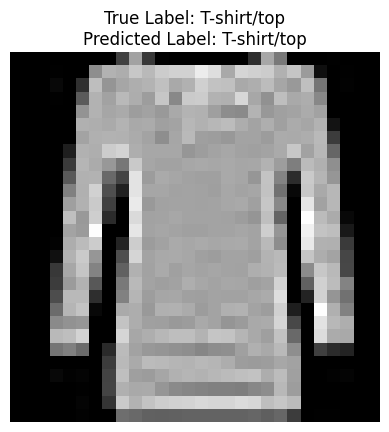


Probability Distribution for All Labels - Image 13:
              Probability
T-shirt/top  9.676133e-04
Trouser      1.458212e-12
Pullover     4.338114e-05
Dress        1.952089e-08
Coat         6.564586e-06
Sandal       1.296011e-08
Shirt        7.618090e-04
Sneaker      2.124169e-11
Bag          9.982207e-01
Ankle boot   4.898439e-09


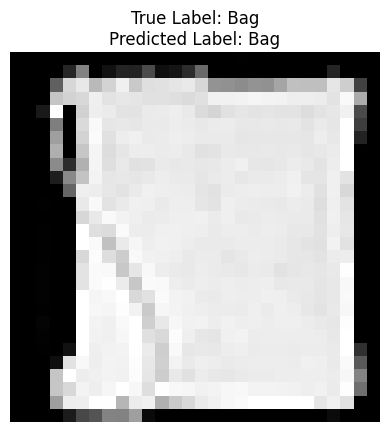


Probability Distribution for All Labels - Image 14:
              Probability
T-shirt/top  2.492818e-07
Trouser      9.999997e-01
Pullover     2.261575e-10
Dress        1.807632e-08
Coat         4.345813e-08
Sandal       3.594277e-14
Shirt        1.022022e-09
Sneaker      3.402524e-15
Bag          1.775221e-11
Ankle boot   8.176312e-16


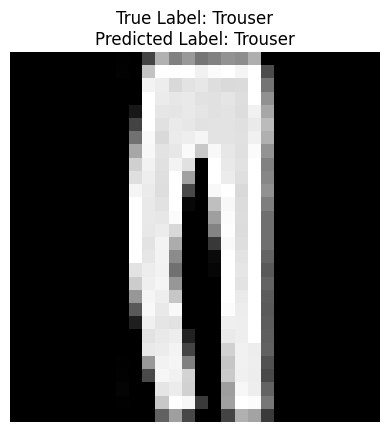


Probability Distribution for All Labels - Image 15:
              Probability
T-shirt/top  1.434684e-07
Trouser      5.710315e-09
Pullover     6.940026e-07
Dress        1.243153e-06
Coat         3.548844e-08
Sandal       2.554297e-06
Shirt        2.137927e-06
Sneaker      9.998758e-01
Bag          3.790655e-05
Ankle boot   7.964105e-05


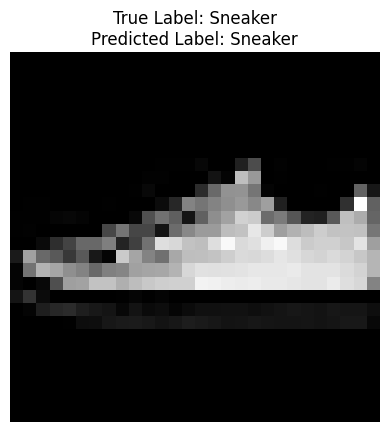


Probability Distribution for All Labels - Image 16:
              Probability
T-shirt/top  9.981731e-01
Trouser      6.986033e-08
Pullover     5.216727e-04
Dress        8.550652e-05
Coat         6.873410e-08
Sandal       1.087389e-11
Shirt        1.219508e-03
Sneaker      1.720590e-12
Bag          7.680089e-09
Ankle boot   2.938092e-09


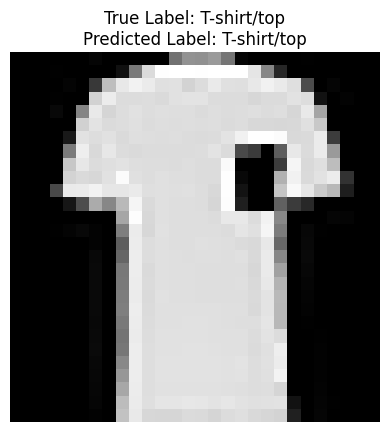


Probability Distribution for All Labels - Image 17:
             Probability
T-shirt/top     0.001146
Trouser         0.000338
Pullover        0.000624
Dress           0.000485
Coat            0.002634
Sandal          0.979791
Shirt           0.000317
Sneaker         0.010261
Bag             0.004175
Ankle boot      0.000227


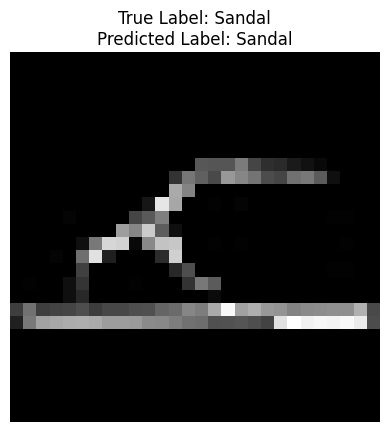


Probability Distribution for All Labels - Image 18:
              Probability
T-shirt/top  1.161570e-06
Trouser      3.866773e-07
Pullover     2.905866e-06
Dress        3.493536e-06
Coat         1.215484e-07
Sandal       7.287418e-05
Shirt        3.504374e-06
Sneaker      1.871208e-04
Bag          9.608971e-10
Ankle boot   9.997284e-01


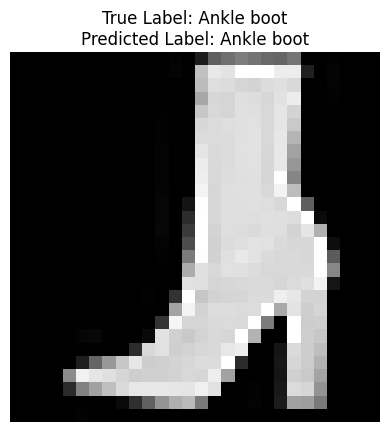


Probability Distribution for All Labels - Image 19:
              Probability
T-shirt/top  9.593454e-10
Trouser      1.081793e-10
Pullover     2.055883e-08
Dress        1.783585e-07
Coat         7.613175e-09
Sandal       1.667993e-05
Shirt        1.007288e-08
Sneaker      9.994551e-01
Bag          2.280376e-04
Ankle boot   2.999994e-04


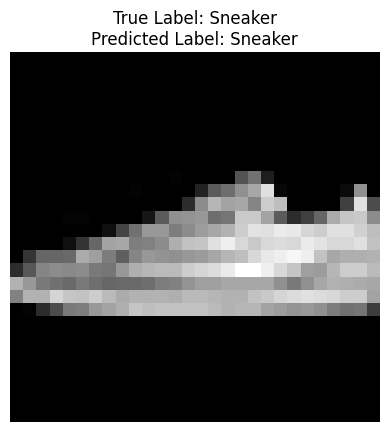


Probability Distribution for All Labels - Image 20:
              Probability
T-shirt/top  4.987828e-05
Trouser      3.150341e-07
Pullover     1.139270e-03
Dress        8.633306e-05
Coat         1.835287e-02
Sandal       1.445229e-06
Shirt        9.803477e-01
Sneaker      1.873939e-07
Bag          2.203952e-05
Ankle boot   2.246928e-09


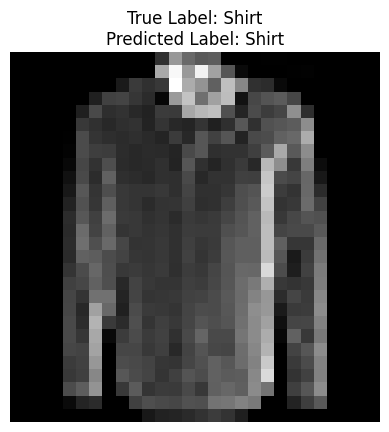


Probability Distribution for All Labels - Image 21:
              Probability
T-shirt/top  2.455550e-04
Trouser      3.274739e-06
Pullover     5.954549e-05
Dress        9.995502e-01
Coat         1.907001e-06
Sandal       2.826320e-10
Shirt        1.392414e-04
Sneaker      6.991025e-09
Bag          2.103776e-07
Ankle boot   2.041283e-07


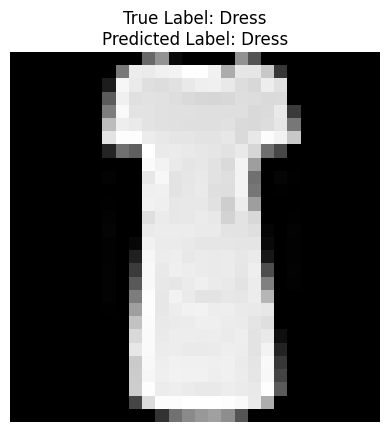


Probability Distribution for All Labels - Image 22:
              Probability
T-shirt/top  3.068823e-01
Trouser      1.150850e-03
Pullover     2.004536e-01
Dress        2.072379e-01
Coat         6.453765e-03
Sandal       1.382241e-08
Shirt        2.773418e-01
Sneaker      1.819946e-06
Bag          4.775570e-04
Ankle boot   4.515073e-07


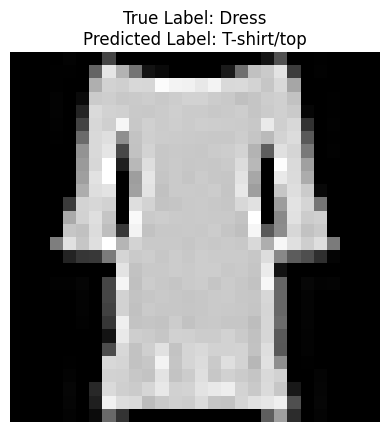


Probability Distribution for All Labels - Image 23:
              Probability
T-shirt/top  7.345962e-10
Trouser      3.038394e-13
Pullover     6.650209e-10
Dress        4.099357e-10
Coat         1.832571e-09
Sandal       1.796112e-04
Shirt        6.140539e-08
Sneaker      1.934010e-02
Bag          1.507299e-06
Ankle boot   9.804787e-01


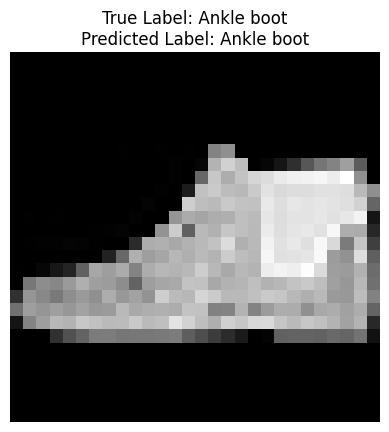


Probability Distribution for All Labels - Image 24:
              Probability
T-shirt/top  5.373330e-07
Trouser      4.060181e-11
Pullover     6.382989e-09
Dress        2.988507e-11
Coat         4.972361e-11
Sandal       9.563088e-02
Shirt        6.232966e-08
Sneaker      1.671071e-05
Bag          5.141093e-11
Ankle boot   9.043518e-01


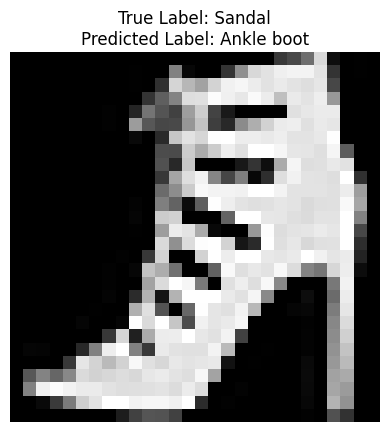


Probability Distribution for All Labels - Image 25:
             Probability
T-shirt/top     0.722440
Trouser         0.009961
Pullover        0.013206
Dress           0.034565
Coat            0.003234
Sandal          0.000079
Shirt           0.216044
Sneaker         0.000013
Bag             0.000154
Ankle boot      0.000303


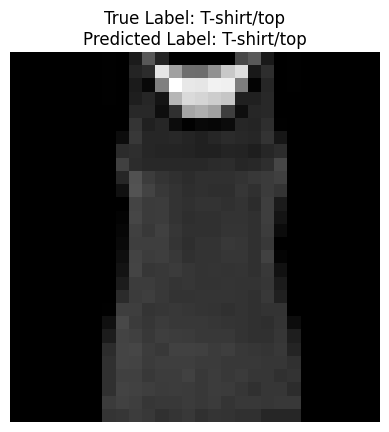

In [20]:
# Randomly display 25 images with their labels, true label, predicted label, and probabilities in a table
data = {'Index': random_indices, 'Image Label': [], 'True Label': [], 'Predicted Label': [], 'Probabilities': []}

for i, index in enumerate(random_indices, 1):
    true_label = np.argmax(test_labels[index])
    predicted_label = np.argmax(predictions[i-1])
    probabilities = predictions[i-1]
    image_label = label_mapping[true_label]

    data['Image Label'].append(image_label)
    data['True Label'].append(label_mapping[true_label])
    data['Predicted Label'].append(label_mapping[predicted_label])
    data['Probabilities'].append(probabilities)

table_df = pd.DataFrame(data)

# Display the table for the 25 random images
print(table_df)

# Display the probability distribution for all labels for each of the 25 images
for i, index in enumerate(random_indices, 1):
    labels = [label_mapping[i] for i in range(10)]
    probability_df = pd.DataFrame(predictions[i-1], index=labels, columns=['Probability'])

    print(f'\nProbability Distribution for All Labels - Image {i}:')
    print(probability_df)

    # Display the image
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f'True Label: {label_mapping[np.argmax(test_labels[index])]}'
              f'\nPredicted Label: {label_mapping[np.argmax(predictions[i-1])]}')
    plt.axis('off')
    plt.show()


In [21]:
# Calculate statistics for the 25 random images
correct_predictions = 0
incorrect_predictions = 0

for i, index in enumerate(random_indices, 1):
    true_label = np.argmax(test_labels[index])
    predicted_label = np.argmax(predictions[i-1])

    if true_label == predicted_label:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

accuracy = correct_predictions / (correct_predictions + incorrect_predictions) * 100

# Display statistics
print(f'Total Images: {len(random_indices)}')
print(f'Correct Predictions: {correct_predictions}')
print(f'Incorrect Predictions: {incorrect_predictions}')
print(f'Accuracy: {accuracy:.2f}%')


Total Images: 25
Correct Predictions: 23
Incorrect Predictions: 2
Accuracy: 92.00%


Show number of train and number of test



In [22]:
# Display the number of images in the training and testing sets
print(f'Number of Training Images: {len(train_images)}')
print(f'Number of Testing Images: {len(test_images)}')


Number of Training Images: 60000
Number of Testing Images: 10000
